# EDA란?

**Exploratory Data Analysis, 탐색적 데이터 분석**

수집한 데이터가 들어왔을 때 이를 다양한 각도에서 관찰하고 만져가며 데이터를 이해하는 과정을 뜻합니다.

단순하게는 데이터 각각의 열과 행이 무슨의미인지 확인해보고 <Br>내가 다뤄야할 관심사(변수들)를 테이블로 요약, 그래프화 하는 것부터,<br>
좀더 많이 들어가면 변수들간의 관계확인, 분포확인, 통계적 가설 검정을 통해 데이터를 직관적으로 바라보는 과정입니다.

이를 통해 
 * 데이터에 문제가 없는지 확인하고
 * 데이터의 전체적인 구성을 이해하고
 * 내가 현 데이터로 앞으로 어떤 분석을 할것인지 생각해보고
 * 목적변수, 설명변수를 확인하여 앞으로의 분석 모형을 구체화 시킬 수 있습니다.

# [Pandas EDA 실전 문제 - GFF포맷 데이터 만져보기]
***

Bio데이터(GFF파일)을 읽어 `pandas_basic_grammar` 에서 배웠던 점들을 몇가지 활용해보아요.<br>
몇가지 질문을 코딩으로 풀어가면서 "이렇게 쓸수 있구나~" 를 확인하는 시간이 되었으면 합니다.

필요한 데이터:
 * GFF파일 : `dataset/Homo_sapiens.GRCh38.97.chr.gff3.gz`
 
GFF포맷이 가진 의미는 다음의 페이지에서 참고하세요
 * [Ensembl GFF설명](https://asia.ensembl.org/info/website/upload/gff.html)
 * [인실리코젠 인코덤](http://www.incodom.kr/GFF_and_GTF)
 
***

우선 실습용 파일이 있는지 확인해봅시다.

github에서 다운 받았다면 dataset 폴더에 데이터가 있을 것이구요 없다면 아래의 페이지에서 GFF3를 다운 받으면 됩니다.

참고) `wget ftp://ftp.ensembl.org/pub/release-97/gff3/homo_sapiens/Homo_sapiens.GRCh38.97.chr.gff3.gz`

## 파일 읽어 DataFrame으로 저장하기
우선 파일을 잘 읽어오기 위해선 내가 읽으려는 파일의 형태를 당연히 잘 파악하고 있어야겠죠,

* GFF포맷은 아래 처럼 9개의 열로 구성되어있습니다.
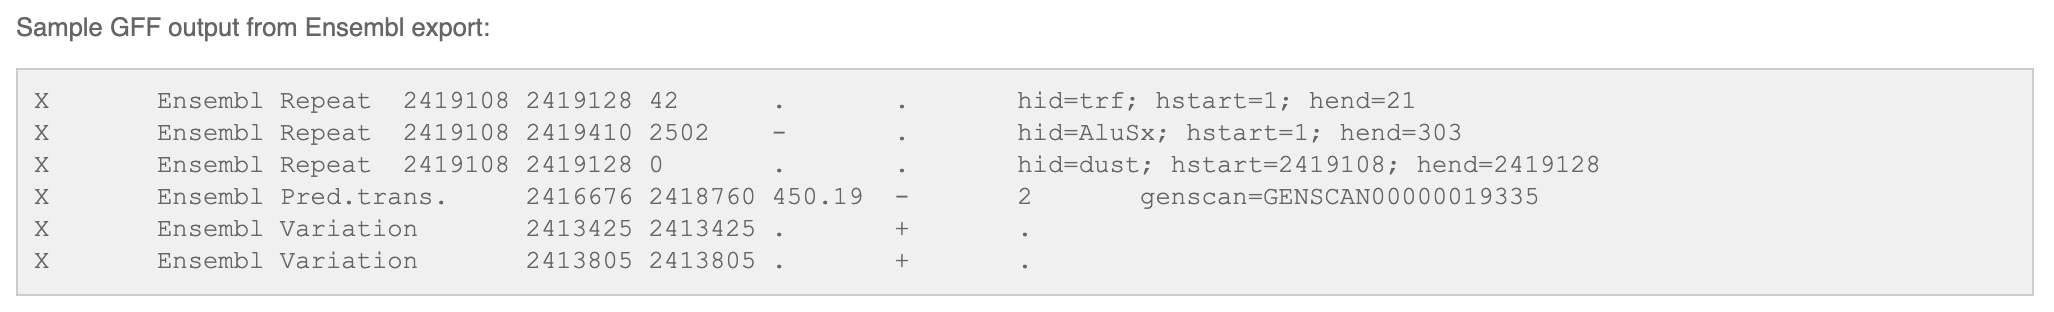


* 각 9개의 열은 다음과 같은 의미네요
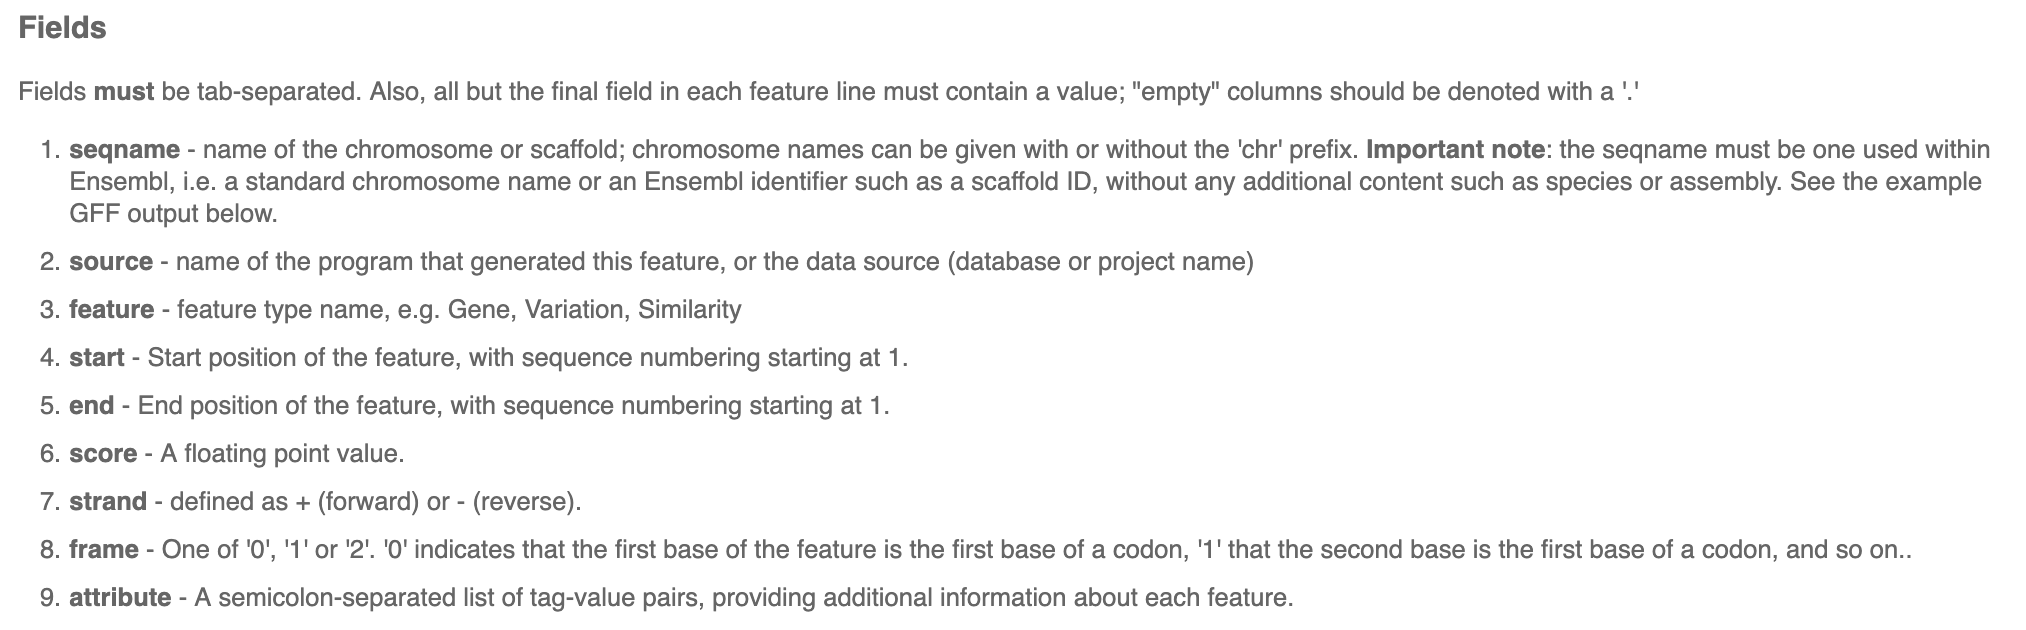

.. 크흠.. 복잡해 보이는데, 우리가 알아야 하는 점은 9개의 열로 구성되어있고 각 열은 텝(\t)으로 분리되어있다는 사실만 알면 읽어 올수 있습니다.

In [1]:
import pandas as pd

In [2]:
# 참고
# 압축이 풀려있는 파일을 pandas로 읽기 위한 함수
# gunzip Homo_sapiens.GRCh38.97.chr.gff3.gz 명령으로 압축파일을 풀었다면 이 함수를 사용하면 됨.
# 그러나 압축파일을 그대로 읽은 것보단 느림.
import io
import os

def read_gff(path):

    with open(path, 'r') as f:
        lines = [l for l in f if not l.startswith('#')]
    return pd.read_csv(
        io.StringIO(''.join(lines)),
        dtype={'start': int, 'end': int},
        sep='\t',
        names=['chr', 'source', 'type',
          'start', 'end', 'score', 'strand', 'phase', 'attrs']
    )

In [2]:
# 파일을 읽어 DataFrame으로 읽어 온다.
file = 'dataset/Homo_sapiens.GRCh38.97.chr.gff3.gz'

df = pd.read_csv(
        file, 
        compression='gzip', 
        sep='\t', 
        names=['chr', 'source', 'type', 'start',
               'end', 'score', 'strand', 'phase', 'attrs']
)

In [3]:
# df2를 출력해 봅시다.
df

,chr,source,type,start,end,score,strand,phase,attrs
0,##gff-version 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,##sequence-region 1 1 248956422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,##sequence-region 10 1 133797422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,##sequence-region 11 1 135086622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,##sequence-region 12 1 133275309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,##sequence-region 13 1 114364328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,##sequence-region 14 1 107043718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,##sequence-region 15 1 101991189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,##sequence-region 16 1 90338345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,##sequence-region 17 1 83257441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 데이터 정제 하기

우리가 위에서 봤던 포맷과는 조금 다릅니다.. 바로 #으로 시작하는 주석 내용이 앞에 달려있기 때문입니다.
그럼 일전에 우리가 공부했던 filtering으로 주석을 날려보는 작업을 해보죠.

**Q? 'chr'열에 `#`으로 시작하는지 아닌지 조건문을 걸어 boolean 결과를 봅시다.**

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: chr, dtype: bool

**Q? 그럼 True인 행을 출력해볼까요?**

,chr,source,type,start,end,score,strand,phase,attrs
0,##gff-version 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,##sequence-region 1 1 248956422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,##sequence-region 10 1 133797422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,##sequence-region 11 1 135086622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,##sequence-region 12 1 133275309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Q? 그럼 반대인 행들을 출력해서 df에 다시 넣으면 되겠네요**

힌트) 관계 연산자는 > = < ~ | & 이 있습니다. 이중 ~는 not을 의미합니다.

In [10]:
df = df[]
df.head()

,chr,source,type,start,end,score,strand,phase,attrs
31,1,Ensembl,chromosome,1.0,248956422.0,.,.,.,"ID=chromosome:1;Alias=CM000663.2,chr1,NC_00000..."
33,1,.,biological_region,10469.0,11240.0,1.3e+03,.,.,external_name=oe %3D 0.79;logic_name=cpg
34,1,.,biological_region,10650.0,10657.0,0.999,+,.,logic_name=eponine
35,1,.,biological_region,10655.0,10657.0,0.999,-,.,logic_name=eponine
36,1,.,biological_region,10678.0,10687.0,0.999,+,.,logic_name=eponine


In [11]:
# 맨 뒷부분 출력
df.tail()

,chr,source,type,start,end,score,strand,phase,attrs
2951292,Y,.,biological_region,26626966.0,26627137.0,0.994,-,.,external_name=rank %3D 1;logic_name=firstef
2951293,Y,.,biological_region,26627457.0,26628186.0,0.997,+,.,external_name=rank %3D 1;logic_name=firstef
2951294,Y,havana,pseudogene,56855244.0,56855488.0,.,+,.,ID=gene:ENSG00000235857;Name=CTBP2P1;biotype=p...
2951295,Y,havana,pseudogenic_transcript,56855244.0,56855488.0,.,+,.,ID=transcript:ENST00000431853;Parent=gene:ENSG...
2951296,Y,havana,exon,56855244.0,56855488.0,.,+,.,Parent=transcript:ENST00000431853;Name=ENSE000...


'source'에 'Ensembl'이라고 적혀있는 행들은 각 염색체의 gene전체를 설명하고 있네요.
전 각 유전자에 관심있으니 이 행들을 모두 지워볼께요

In [12]:
# Ensembl 이 담겨있는 행들을 출력해봅시다.


,chr,source,type,start,end,score,strand,phase,attrs
31,1,Ensembl,chromosome,1.0,248956422.0,.,.,.,"ID=chromosome:1;Alias=CM000663.2,chr1,NC_00000..."
270858,10,Ensembl,chromosome,1.0,133797422.0,.,.,.,"ID=chromosome:10;Alias=CM000672.2,chr10,NC_000..."
382137,11,Ensembl,chromosome,1.0,135086622.0,.,.,.,"ID=chromosome:11;Alias=CM000673.2,chr11,NC_000..."
554243,12,Ensembl,chromosome,1.0,133275309.0,.,.,.,"ID=chromosome:12;Alias=CM000674.2,chr12,NC_000..."
720634,13,Ensembl,chromosome,1.0,114364328.0,.,.,.,"ID=chromosome:13;Alias=CM000675.2,chr13,NC_000..."


In [13]:
# 각 염색체 전체를 담고있는게 맞네요, 지워 줍니다.
df = df[~(df['source'] == "Ensembl")]
df.head()

,chr,source,type,start,end,score,strand,phase,attrs
33,1,.,biological_region,10469.0,11240.0,1.3e+03,.,.,external_name=oe %3D 0.79;logic_name=cpg
34,1,.,biological_region,10650.0,10657.0,0.999,+,.,logic_name=eponine
35,1,.,biological_region,10655.0,10657.0,0.999,-,.,logic_name=eponine
36,1,.,biological_region,10678.0,10687.0,0.999,+,.,logic_name=eponine
37,1,.,biological_region,10681.0,10688.0,0.999,-,.,logic_name=eponine


In [108]:
# 인덱스가 0번부터 시작하질 않네요. 고쳐봅시다.
df = df.

In [ ]:
# pandas Dateframe에선 missing이 NaN입니다. '.'을 NaN으로 교체하고 싶네요~ (replace사용)


## 데이터 탐색하기

데이터가 만들어 졌다면, 각 열(변수)들을 summary하는 일은 필!수! 입니다. 해보죠

chr         object
source      object
type        object
start        int64
end          int64
score       object
strand      object
phase       object
attrs       object
gene_len     int64
dtype: object

start, end는 포지션인데 소숫점이 찍혀있어서 뭔가 불편합니다. 형 변환이 필요합니다.

In [110]:
df[['start', 'end']] = df[['start', 'end']].astype(int)
df.head()

,chr,source,type,start,end,score,strand,phase,attrs,gene_len
0,1,.,biological_region,10469,11240,1.3e+03,.,.,external_name=oe %3D 0.79;logic_name=cpg,772
1,1,.,biological_region,10650,10657,0.999,+,.,logic_name=eponine,8
2,1,.,biological_region,10655,10657,0.999,-,.,logic_name=eponine,3
3,1,.,biological_region,10678,10687,0.999,+,.,logic_name=eponine,10
4,1,.,biological_region,10681,10688,0.999,-,.,logic_name=eponine,8


chr         object
source      object
type        object
start        int64
end          int64
score       object
strand      object
phase       object
attrs       object
gene_len     int64
dtype: object

다른 통계량 확인해보죠

,start,end,gene_len
count,2.890659e+06,2.890659e+06,2.890659e+06
mean,7.463664e+07,7.464056e+07,3.925582e+03
std,5.604397e+07,5.604429e+07,2.980241e+04
min,5.770000e+02,6.470000e+02,1.000000e+00
25%,3.176504e+07,3.176786e+07,8.400000e+01
50%,6.079471e+07,6.080053e+07,1.330000e+02
75%,1.105063e+08,1.105082e+08,2.500000e+02
max,2.489450e+08,2.489452e+08,2.473537e+06


In [6]:
# 범주형 컬럼들은 value_counts로 요약 가능했죠?
# 우선 범주형 컬럼을 확인해 봅시다.
df.columns[df.dtypes == 'object']

Index(['chr', 'source', 'type', 'score', 'strand', 'phase', 'attrs'], dtype='object')

In [115]:
# chr에 관하여 살펴봅시다.
df['chr'].value_counts()

1     265354
2     215915
3     184514
17    173690
19    171825
11    168744
12    163335
7     139227
16    135778
6     132429
5     128988
4     115581
10    108945
15    107781
8     106386
9     103633
14     99475
X      91975
20     68741
22     64026
18     52996
13     48798
21     34495
Y       7903
MT       125
Name: chr, dtype: int64

In [116]:
# strand 방향에 대해서도 살펴 보죠.
df['strand'].value_counts()

+    1461267
-    1406882
.      22510
Name: strand, dtype: int64

**Q? 유전자의 길이를 나타내는 'gene_len' 컬럼을 새로 만들어 df에 넣어 봅시다.**

In [117]:

df.head()

,chr,source,type,start,end,score,strand,phase,attrs,gene_len
0,1,.,biological_region,10469,11240,1.3e+03,.,.,external_name=oe %3D 0.79;logic_name=cpg,772
1,1,.,biological_region,10650,10657,0.999,+,.,logic_name=eponine,8
2,1,.,biological_region,10655,10657,0.999,-,.,logic_name=eponine,3
3,1,.,biological_region,10678,10687,0.999,+,.,logic_name=eponine,10
4,1,.,biological_region,10681,10688,0.999,-,.,logic_name=eponine,8


In [118]:
# gene len에 value_count
df['gene_len'].value_counts()

96        19765
102       18220
93        17881
84        17843
105       17738
99        17656
108       17543
81        17398
72        17237
78        17063
111       17040
117       16850
87        16785
90        16703
126       16478
123       16380
114       16350
75        16158
120       16137
129       15571
107       15424
69        15321
109       15256
98        14993
103       14847
100       14645
132       14595
127       14519
104       14502
118       14412
          ...  
21412         1
27555         1
25506         1
31649         1
107418        1
134127        1
193520        1
189426        1
46792         1
695011        1
136173        1
33727         1
41915         1
46009         1
54197         1
58291         1
57029         1
50886         1
42698         1
179193        1
38604         1
107419        1
125842        1
66447         1
76682         1
465740        1
348933        1
582323        1
164862        1
29650         1
Name: gene_len, Length: 

**Q? chr 1에 대하여 200까지 유전자 길이의 frequency를 그려보기**

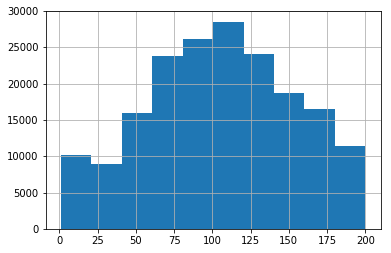

In [119]:
df2 = 
df2.hist()

hist말고 line그래프를 그려봅시다.
기본적으로 선 그래프는 x축 y축이 필요합니다.

여기서 우린 x축을 gene_len, y축을 frequency로 잡으려 합니다.

In [120]:
# x축을 gene_len, y축을 frequency로 잡기 위해 df3로 value_count에 대한 df를 생성합니다.
df3 = 
df3.head()

,gene_len
96,1876
173,1867
111,1784
52,1699
93,1635


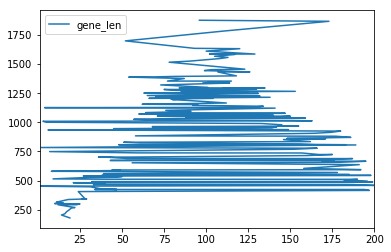

In [121]:
# plot.line()으로 그려봅니다.
df3.plot.line()

엉망입니다... 아무래도 x축을 sort해줘야 하는것 같습니다.

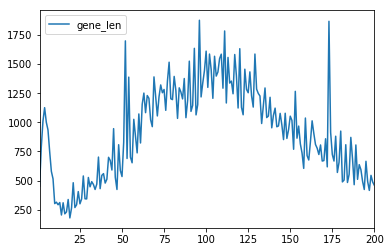

In [122]:
# sort_value와 비슷한 개념으로 sort_index가 있습니다. method chaining방법으로 그려봅니다.
df3.

attrs 컬럼을 보면 참 많은 정보들이 담겨있습니다.

세미 콜론으로 분리되어있고, 분리되어있는 항목들이 달라보입니다.

이중 우리는 유전자의 id 혹은 transcript id는 꼭 필요해 보입니다. 따로 분리 해야겠습니다.

**Q? Apply를 이용하여 'ID=' 혹은 'Name='로 시작하는 데이터를 분리하여 df에 새로운 컬럼 'id'을 추가 해보세요**

In [123]:
# 먼저 attrs를 봅시다.
df['attrs']

0                   external_name=oe %3D 0.79;logic_name=cpg
1                                         logic_name=eponine
2                                         logic_name=eponine
3                                         logic_name=eponine
4                                         logic_name=eponine
5                                         logic_name=eponine
6                                         logic_name=eponine
7                                         logic_name=eponine
8                                         logic_name=eponine
9                                         logic_name=eponine
10                                        logic_name=eponine
11                                        logic_name=eponine
12                                        logic_name=eponine
13                                        logic_name=eponine
14                                        logic_name=eponine
15         ID=gene:ENSG00000223972;Name=DDX11L1;biotype=t...
16         ID=transcript

In [124]:
# 한 셀만 자세히 살펴보죠 (iloc이용)


'ID=transcript:ENST00000450305;Parent=gene:ENSG00000223972;Name=DDX11L1-201;biotype=transcribed_unprocessed_pseudogene;tag=basic;transcript_id=ENST00000450305;transcript_support_level=NA;version=2'

In [131]:
# 탐색이 끝났습니다. ';'으로 분리하고 'ID=' 혹은 'Name='로 시작하는 데이터를 가지고 오는 함수를 만들어야 하는군요

import numpy as np # 원하는 조건이 없을 때, np.nan으로 missing값 처리 하려고

def get_id(row):


In [132]:
# apply 써봅니다.


0                               NaN
1                               NaN
2                               NaN
3                               NaN
4                               NaN
5                               NaN
6                               NaN
7                               NaN
8                               NaN
9                               NaN
10                              NaN
11                              NaN
12                              NaN
13                              NaN
14                              NaN
15          ID=gene:ENSG00000223972
16    ID=transcript:ENST00000456328
17             Name=ENSE00002234944
18             Name=ENSE00003582793
19             Name=ENSE00002312635
20    ID=transcript:ENST00000450305
Name: attrs, dtype: object

In [133]:
# 그럼 이제 id라는 컬럼을 새로 넣어 봅시다.

df.head(20)

,chr,source,type,start,end,score,strand,phase,attrs,gene_len,id
0,1,.,biological_region,10469,11240,1.3e+03,.,.,external_name=oe %3D 0.79;logic_name=cpg,772,NaN
1,1,.,biological_region,10650,10657,0.999,+,.,logic_name=eponine,8,NaN
2,1,.,biological_region,10655,10657,0.999,-,.,logic_name=eponine,3,NaN
3,1,.,biological_region,10678,10687,0.999,+,.,logic_name=eponine,10,NaN
4,1,.,biological_region,10681,10688,0.999,-,.,logic_name=eponine,8,NaN
5,1,.,biological_region,10707,10716,0.999,+,.,logic_name=eponine,10,NaN
6,1,.,biological_region,10708,10718,0.999,-,.,logic_name=eponine,11,NaN
7,1,.,biological_region,10735,10747,0.999,-,.,logic_name=eponine,13,NaN
8,1,.,biological_region,10737,10744,0.999,+,.,logic_name=eponine,8,NaN
9,1,.,biological_region,10766,10773,0.999,+,.,logic_name=eponine,8,NaN


아무래도 유전자 이름도 모르는곳은 저에게는 의미가 없어 보입니다.

id 열이 missing인 행은 다 지워 버리기로 하죠.

In [136]:
df.dropna(subset=['id'])

,chr,source,type,start,end,score,strand,phase,attrs,gene_len,id
15,1,havana,pseudogene,11869,14409,.,+,.,ID=gene:ENSG00000223972;Name=DDX11L1;biotype=t...,2541,ID=gene:ENSG00000223972
16,1,havana,lnc_RNA,11869,14409,.,+,.,ID=transcript:ENST00000456328;Parent=gene:ENSG...,2541,ID=transcript:ENST00000456328
17,1,havana,exon,11869,12227,.,+,.,Parent=transcript:ENST00000456328;Name=ENSE000...,359,Name=ENSE00002234944
18,1,havana,exon,12613,12721,.,+,.,Parent=transcript:ENST00000456328;Name=ENSE000...,109,Name=ENSE00003582793
19,1,havana,exon,13221,14409,.,+,.,Parent=transcript:ENST00000456328;Name=ENSE000...,1189,Name=ENSE00002312635
20,1,havana,pseudogenic_transcript,12010,13670,.,+,.,ID=transcript:ENST00000450305;Parent=gene:ENSG...,1661,ID=transcript:ENST00000450305
21,1,havana,exon,12010,12057,.,+,.,Parent=transcript:ENST00000450305;Name=ENSE000...,48,Name=ENSE00001948541
22,1,havana,exon,12179,12227,.,+,.,Parent=transcript:ENST00000450305;Name=ENSE000...,49,Name=ENSE00001671638
23,1,havana,exon,12613,12697,.,+,.,Parent=transcript:ENST00000450305;Name=ENSE000...,85,Name=ENSE00001758273
24,1,havana,exon,12975,13052,.,+,.,Parent=transcript:ENST00000450305;Name=ENSE000...,78,Name=ENSE00001799933


완성!

여기까지 GFF데이터를 이용해서 데이터를 읽고, 정제하고 데이터를 이해하며 변형 해보는 시간을 가졌습니다.

분명 같은 데이터에도 자신의 목적에 따라 하고싶은 데이터 탐색 방법이 다를겁니다. 여기서 끝내지 마시고 돌아가셔서 GFF파일에서 더 만져볼 것은 없는가? 아이디어 내보시고 코딩하시다보면 나만의 데이터가 생겼을 때 자신있게 탐색을 시작하실 수 있을 겁니다.

아이디어가 필요한 분들께 마지막으로 문제 하나 만들어 드리고 본 notebook을 마치겠습니다.

***

### Q? GFF에서 임의의 타겟 영역을 지정해 주면, 해당하는 유전자와 type, strand direction을 출력해주는 스크립트 혹은 notebook 를 작성해보세요
### 스크립트를 작성시 실행 코드 화면은 다음과 같습니다.
`python genefinder.py chr01 18540951`





hint. filtering과 apply함수를 이용합니다.